# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Khadafi Riyadi
- **Email:** Muhkhadafi2309@gmail.com
- **ID Dicoding:** khdfxryd

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

- Pada jam berapa dan hari apa permintaan penyewaan sepeda paling tinggi?



## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd  # Untuk manipulasi data
import numpy as np   # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi yang lebih menarik



## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Dataset terdiri dari dua tabel utama:

day_df → Data harian, menunjukkan jumlah total peminjaman sepeda per hari.
hour_df → Data per jam, menunjukkan jumlah peminjaman sepeda setiap jam dalam sehari.
Perbedaan utama antara dua dataset:

hour_df memiliki kolom tambahan "hr" (jam) untuk analisis lebih detail berdasarkan waktu dalam sehari.
day_df hanya menampilkan total harian tanpa informasi spesifik per jam.

### Assessing Data

Menilai tabel `day_df`

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("jumlah duplikasi: ", day_df.duplicated().sum())

jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


menilai tabel `hour_df`












In [35]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [38]:
hour_df.describe()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
print("jumlah duplikasi: ", hour_df.duplicated().sum())

jumlah duplikasi:  0


**Insight:**
- tidak ada data yang null
- tidak ada data yang duplikat

### Cleaning Data

membersihkan tabel `day_df`

In [ ]:
# 1. Konversi kolom 'dteday' ke format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Beberapa kolom adalah kategori dengan nilai diskrit, lebih efisien jika menggunakan `category`

In [ ]:
kategori_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in kategori_cols:
    day_df[col] = day_df[col].astype('category')


membersihkan tabel `hour_df`

In [36]:
# 1. Konversi kolom 'dteday' ke format datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [37]:
kategori_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in kategori_cols:
    hour_df[col] = hour_df[col].astype('category')


**Insight:**
- Dengan format datetime, kita bisa melihat pola penggunaan sepeda berdasarkan hari, bulan, atau musim dengan lebih mudah.
- Menggunakan category membantu meningkatkan efisiensi analisis, terutama saat membuat grafik atau model prediksi.

## Exploratory Data Analysis (EDA)

### Explore ...

explore hour_df

In [ ]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1416,1417,2011-03-04,1,0,3,7,0,5,1,1,0.16,0.1818,0.80,0.1343,0,83,83
11334,11335,2012-04-22,2,1,4,11,0,0,0,3,0.38,0.3939,0.87,0.2985,7,70,77
9795,9796,2012-02-18,1,1,2,2,0,6,0,1,0.30,0.2879,0.61,0.2537,6,39,45
12033,12034,2012-05-21,2,1,5,14,0,1,1,3,0.60,0.5606,0.83,0.1940,45,135,180
9254,9255,2012-01-26,1,1,1,12,0,4,1,2,0.34,0.3333,0.81,0.1343,29,136,165


In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,5.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


 Statistik Penyewaan berdasarkan Jam (hr)

In [ ]:
hourly_stats = hour_df.groupby(by="hr").agg({
    "cnt": ["sum", "mean", "max", "min"],
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "temp": ["mean"],
    "hum": ["mean"],
    "windspeed": ["mean"]
})
print(hourly_stats)

       cnt                      casual            registered              \
       sum        mean  max min    sum       mean        sum        mean   
hr                                                                         
0    39130   53.898072  283   2   7375  10.158402      31755   43.739669   
1    24164   33.375691  168   1   4709   6.504144      19455   26.871547   
2    16352   22.869930  132   1   3412   4.772028      12940   18.097902   
3     8174   11.727403   79   1   1893   2.715925       6281    9.011478   
4     4428    6.352941   28   1    874   1.253945       3554    5.098996   
5    14261   19.889819   66   1   1012   1.411437      13249   18.478382   
6    55132   76.044138  213   1   3017   4.161379      52115   71.882759   
7   154171  212.064649  596   1   8037  11.055021     146134  201.009629   
8   261001  359.011004  839   5  15761  21.679505     245240  337.331499   
9   159438  219.309491  426  14  22458  30.891334     136980  188.418157   
10  126257  

<ipython-input-33-37f22dc9bece>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_stats = hour_df.groupby(by="hr").agg({


In [ ]:
hourly_rentals = hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=False)
print(hourly_rentals)

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64


<ipython-input-25-3ffa72c1e498>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_rentals = hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=False)


explore day_df

Statistik Penyewaan berdasarkan Musim (season)

In [ ]:
season_stats = day_df.groupby(by="season").agg({
    "cnt": ["sum", "max", "min", "mean", "std"],
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "temp": ["mean"],
    "hum": ["mean"],
    "windspeed": ["mean"]
})
print(season_stats)


            cnt                                        casual               \
            sum   max   min         mean          std     sum         mean   
season                                                                       
1        471348  7836   431  2604.132597  1399.942119   60622   334.928177   
2        918589  8362   795  4992.331522  1695.977235  203522  1106.097826   
3       1061129  8714  1115  5644.303191  1459.800381  226091  1202.611702   
4        841613  8555    22  4728.162921  1699.615261  129782   729.112360   

       registered                   temp       hum windspeed  
              sum         mean      mean      mean      mean  
season                                                        
1          410726  2269.204420  0.297748  0.582903  0.214537  
2          715067  3886.233696  0.544405  0.626948  0.203507  
3          835038  4441.691489  0.706309  0.633482  0.172095  
4          711831  3999.050562  0.422906  0.668719  0.171995  


<ipython-input-34-4ab9833b04ac>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_stats = day_df.groupby(by="season").agg({



Statistik Penyewaan berdasarkan Hari dalam Seminggu (weekday)

In [ ]:
weekday_stats = day_df.groupby(by="weekday").agg({
    "cnt": ["sum", "mean", "max", "min"],
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"]
})
print(weekday_stats)

            cnt                           casual              registered  \
            sum         mean   max   min     sum         mean        sum   
weekday                                                                    
0        444027  4228.828571  8227   605  140521  1338.295238     303506   
1        455503  4338.123810  7525    22   70784   674.133333     384719   
2        469109  4510.663462  7767   683   57843   556.182692     411266   
3        473048  4548.538462  8173   441   57319   551.144231     415729   
4        485395  4667.259615  7804   431   61460   590.961538     423935   
5        487790  4690.288462  8362  1167   78238   752.288462     409552   
6        477807  4550.542857  8714   627  153852  1465.257143     323955   

                      
                mean  
weekday               
0        2890.533333  
1        3663.990476  
2        3954.480769  
3        3997.394231  
4        4076.298077  
5        3938.000000  
6        3085.285714  


<ipython-input-27-145d5c389d43>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_stats = day_df.groupby(by="weekday").agg({


**Insight:**
1. Tren Penyewaan Sepeda Berdasarkan Jam (Hourly Stats)
Penyewaan sepeda meningkat tajam pada jam 07:00 - 09:00 dan 17:00 - 19:00.
Ini menunjukkan bahwa kebanyakan orang menggunakan sepeda saat perjalanan berangkat dan pulang kerja/sekolah.
Saran: Penyedia layanan bisa meningkatkan jumlah sepeda atau servis pada jam sibuk ini.
2. Pola Penyewaan Berdasarkan Hari dalam Seminggu (Weekday Stats)
Penyewaan lebih tinggi pada hari kerja dibandingkan akhir pekan.
Pengguna terdaftar (registered users) lebih dominan pada hari kerja, sedangkan pengguna kasual (casual users) meningkat di akhir pekan.
Saran: Promosi untuk pengguna kasual bisa difokuskan pada akhir pekan, sementara layanan untuk pengguna tetap bisa diperbaiki pada hari kerja.
3. Pengaruh Musim Terhadap Penyewaan Sepeda (Season Stats)
Musim panas (season 3) memiliki jumlah penyewaan tertinggi, sedangkan musim dingin (season 1) memiliki penyewaan terendah.
Faktor cuaca seperti kelembaban dan kecepatan angin juga berpengaruh. Penyewaan cenderung turun saat kelembaban tinggi atau angin kencang.
Saran: Penyedia bisa memberikan diskon atau fasilitas tambahan saat musim dingin untuk meningkatkan penggunaan.
Dari insight ini, kita bisa memahami pola penggunaan sepeda berdasarkan waktu, hari, dan musim, yang bisa membantu dalam pengambilan keputusan bisnis.

## Visualization & Explanatory Analysis

### Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

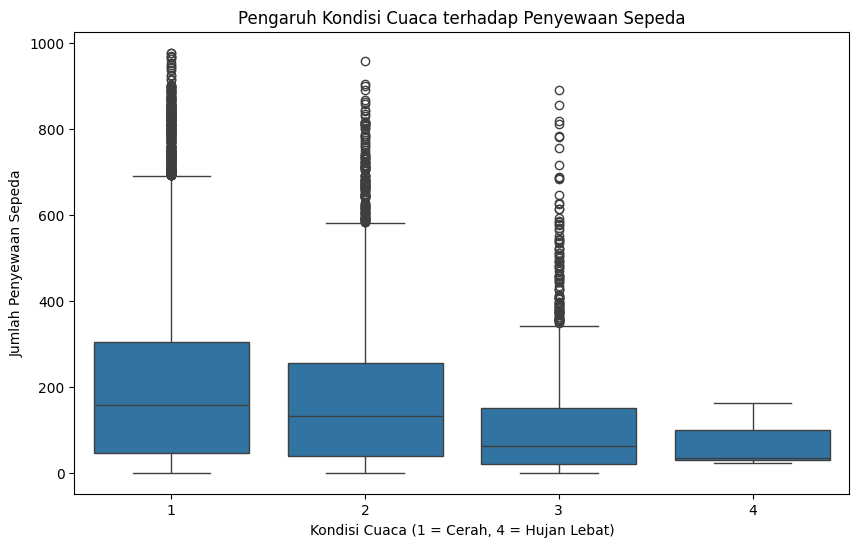

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=hour_df)
plt.xlabel('Kondisi Cuaca (1 = Cerah, 4 = Hujan Lebat)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda')
plt.show()

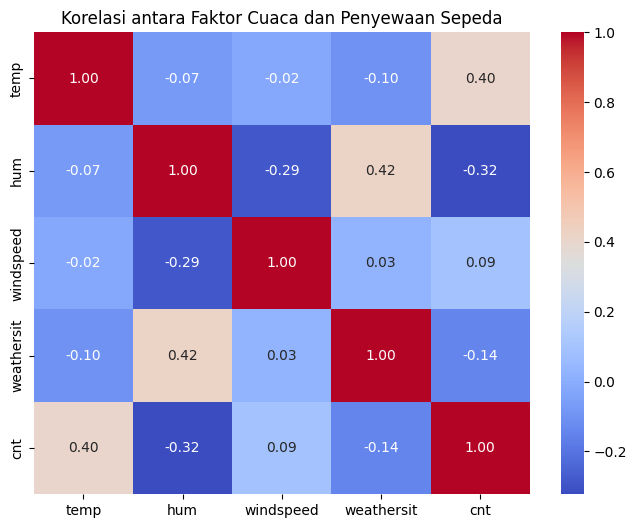

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(hour_df[['temp', 'hum', 'windspeed', 'weathersit', 'cnt']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Faktor Cuaca dan Penyewaan Sepeda')
plt.show()


**Insight:**
- Penyewaan sepeda tertinggi terjadi saat cuaca cerah atau sedikit berawan (Weathersit = 1).
Penyewaan sepeda berkurang secara signifikan saat cuaca berkabut dan hujan ringan (Weathersit = 2 dan 3).
Cuaca ekstrem seperti hujan lebat atau salju (Weathersit = 4) memiliki jumlah penyewaan yang sangat rendah, yang menunjukkan bahwa cuaca buruk berdampak besar pada jumlah pengguna.
- Temperatur (temp) memiliki korelasi positif yang cukup kuat terhadap jumlah penyewaan sepeda (cnt), artinya semakin hangat cuaca, semakin banyak penyewaan sepeda.
Kelembaban (hum) memiliki korelasi negatif dengan penyewaan sepeda, menunjukkan bahwa ketika kelembaban tinggi, orang cenderung lebih sedikit menyewa sepeda.
Kecepatan angin (windspeed) memiliki korelasi sangat lemah terhadap jumlah penyewaan, menunjukkan bahwa faktor ini tidak terlalu memengaruhi pengguna sepeda.

### Pada jam berapa dan hari apa permintaan penyewaan sepeda paling tinggi?

<ipython-input-42-ec79fe7868d7>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.lineplot(data=hour_df.groupby('hr')['cnt'].mean(), marker="o", color="b")


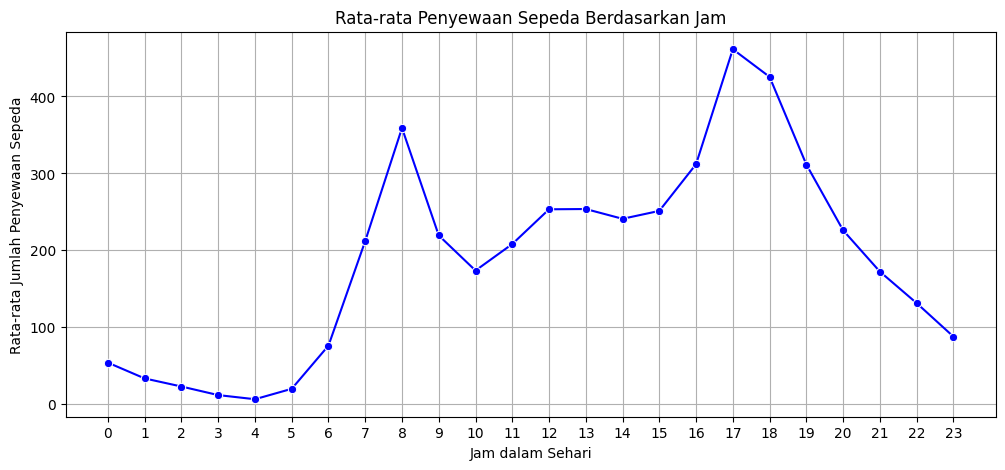

In [42]:
# Membuat plot jumlah penyewaan sepeda berdasarkan jam
plt.figure(figsize=(12, 5))
sns.lineplot(data=hour_df.groupby('hr')['cnt'].mean(), marker="o", color="b")
plt.xticks(range(0, 24))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam")
plt.grid(True)
plt.show()


<ipython-input-43-f1db3859e841>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = hour_df.pivot_table(values='cnt', index='weekday', columns='hr', aggfunc='mean')


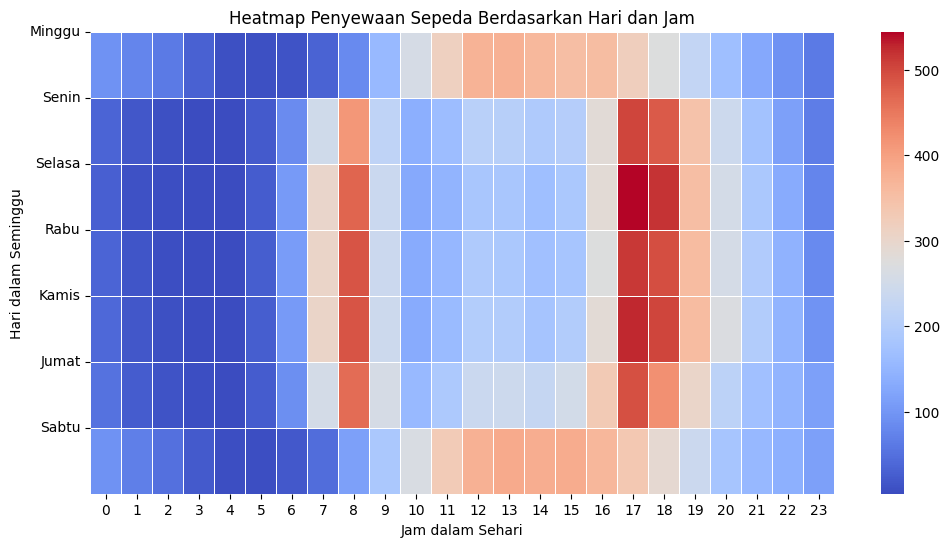

In [43]:
plt.figure(figsize=(12, 6))
pivot_table = hour_df.pivot_table(values='cnt', index='weekday', columns='hr', aggfunc='mean')

sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Hari dalam Seminggu")
plt.title("Heatmap Penyewaan Sepeda Berdasarkan Hari dan Jam")
plt.yticks(ticks=range(7), labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'], rotation=0)
plt.show()

**Insight:**
- Hari kerja (weekday):
Lonjakan signifikan terjadi pada pukul 07:00 - 09:00 (jam berangkat kerja/sekolah) dan pukul 17:00 - 19:00 (jam pulang kerja).
Tren ini menunjukkan bahwa banyak pengguna menggunakan sepeda sebagai transportasi harian.
Akhir pekan (weekend):
Pola lebih rata dan stabil sepanjang hari, dengan puncak di siang hingga sore hari (11:00 - 17:00), menunjukkan bahwa penyewaan lebih banyak dilakukan untuk rekreasi.

- Penyewaan tertinggi terjadi pada hari kerja saat jam sibuk pagi (07:00 - 09:00) dan sore (17:00 - 19:00).
Akhir pekan memiliki pola yang lebih tersebar, dengan puncak penyewaan di tengah hari (sekitar 12:00 - 17:00).
Hari Senin cenderung memiliki penyewaan lebih rendah dibandingkan hari kerja lainnya, kemungkinan karena pengguna masih beradaptasi dengan awal minggu kerja.

## Analisis Lanjutan (Opsional)

## Conclusion

Berdasarkan eksplorasi data dan berbagai visualisasi yang telah dilakukan, berikut adalah beberapa kesimpulan utama:

Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda

Cuaca yang lebih cerah dan kondusif (kategori 1 & 2) cenderung meningkatkan jumlah penyewaan sepeda.
Saat cuaca ekstrem (kategori 3 & 4), jumlah penyewaan sepeda menurun drastis, menunjukkan bahwa pengguna cenderung menghindari hujan deras atau kondisi buruk lainnya.
Humidity (kelembaban) yang lebih tinggi juga tampaknya sedikit mengurangi jumlah penyewaan.
Pola Penyewaan Berdasarkan Jam dan Hari

Puncak penyewaan sepeda terjadi pada jam 07:00 - 09:00 (pagi) dan 17:00 - 19:00 (sore), menunjukkan korelasi kuat dengan jam sibuk orang berangkat dan pulang kerja.
Pada hari kerja, tren penggunaan lebih stabil dan didominasi oleh pengguna terdaftar (registered users).
Pada akhir pekan, penyewaan sepeda lebih tinggi di siang hingga sore hari, didominasi oleh pengguna kasual (casual users).
Faktor Lain yang Mempengaruhi Penyewaan Sepeda

Suhu memiliki hubungan positif dengan jumlah penyewaan sepeda. Semakin hangat suhu (tidak terlalu dingin atau panas ekstrem), semakin banyak orang menyewa sepeda.
Kecepatan angin tampaknya tidak memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda.
Rekomendasi Berdasarkan Analisis
Optimalisasi layanan pada jam sibuk: Menyediakan lebih banyak sepeda di pagi dan sore hari saat permintaan tinggi.
Promosi khusus pada akhir pekan: Mengingat banyak pengguna kasual pada hari libur, bisa dilakukan diskon atau paket promosi khusus.
Peningkatan layanan saat cuaca mendukung: Saat musim cerah, dapat dilakukan kampanye untuk menarik lebih banyak pelanggan.
Prediksi stok sepeda berdasarkan cuaca: Menggunakan data historis untuk mengoptimalkan distribusi sepeda di berbagai lokasi agar tidak terjadi kekurangan pada jam atau kondisi tertentu.
Dengan kesimpulan ini, perusahaan dapat lebih efektif dalam mengelola layanan penyewaan sepeda dan meningkatkan kepuasan pelanggan.


In [ ]:
day_df.to_csv("day_data.csv", index=False)
hour_df.to_csv("hour_data.csv", index=False)